# Image Flipping

Since left eye and right eye images are different because the pupil point to opposite directions, on this notebook a vertical flip is applied over the right eye images to make them similar to the left ones.

This process is done make the data more homogeneus and helps the deep learning model into the learning process.

In [25]:
# import libraries
import os
import shutil

# to plot images
import imageio
import matplotlib.pyplot as plt

# flipping process is done using cv2 library
import cv2

Here an example of the flipping process can be seen over a sample right image tagged as Diabetes (D).

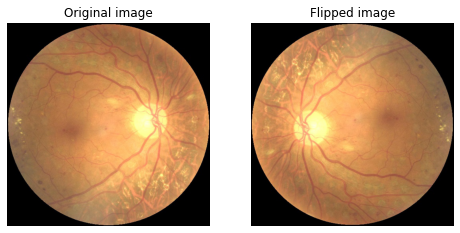

In [24]:
sample_image = './labeled-images/train/D/50_right.jpg'

# read image
im = imageio.imread(sample_image)

# flip image
flipped_image = cv2.flip(im, -1)

# plot image
f, ax = plt.subplots(1,2, figsize=(8,8))  

ax[0].title.set_text("Original image")
ax[0].imshow(im)
ax[0].axis('off')

ax[1].title.set_text("Flipped image")
ax[1].imshow(flipped_image)
ax[1].axis('off')

plt.show()

Now, the flip process is applied to the right images generating a new directory 'labeled-images-flipped' with the same structure as the previous 'labeled-images' directory.
<pre>
labeled-images-flipped/
├── train/ 
│   ├── A/
│   │   ├── 43_left.jpg
│   │   ├── (...)
│   ├── C/
│   └── (...)
├── test/
    ├── A/
    │   ├── (...)
    ├── C/
    └── (...)
</pre>

In [27]:
'''
This function takes the actual dataset path and the new dataset path (train or test) and loop over the images,
applying the flip conversion to the right ones and moving the files to a new directory 
(right images are flipped and copied to the new directory and left images are just copied)
'''

def flip_images_to_directory(dataset_path, new_dataset_path):
    classes_path = [dataset_path + c for c in os.listdir(dataset_path)]
    for class_directory in classes_path:
        new_class_path = new_dataset_path + class_directory.split('/')[-1]
        if not os.path.exists(new_class_path): os.mkdir(new_class_path) 
        images_path = [class_directory+'/'+im for im in os.listdir(class_directory)]
        for im in images_path:
            aux = im.split('/')
            new_path = new_dataset_path + aux[-2] + '/' + aux[-1]
            if im[-9:] == 'right.jpg':
                image = cv2.imread(im)
                flipped_image = cv2.flip(image, -1)
                cv2.imwrite(new_path, flipped_image)
            else:
                shutil.copyfile(im, new_path)

In [28]:
'''
This command might take some time (1 or 2 minutes) and requires permission to make new directories and copy files on them.
'''

# actual dataset paths
train_path = "./labeled-images/train/"
test_path = "./labeled-images/test/"

# new dataset paths
new_train_path = "./labeled-images-flipped/train/"
new_test_path = "./labeled-images-flipped/test/"

# create new main directory if not exists
if not os.path.exists('./labeled-images-flipped'): os.mkdir('./labeled-images-flipped') 

# create new train and test directories under main directory
if not os.path.exists(new_train_path): os.mkdir(new_train_path) 
if not os.path.exists(new_test_path): os.mkdir(new_test_path)


# Call the function to apply the conversion and copy the files to new directories
# for the train set
print("Applying flipping process to the train set and moving files to the new directory...")
flip_images_to_directory(train_path, new_train_path)
print('Done!')

# for the test set
print("Applying flipping process to the test set and moving files to the new directory...")
flip_images_to_directory(test_path, new_test_path)
print('Done!')

print('Flipping process finished successfully!')

Applying flipping process to the train set and moving files to the new directory...
Done!
Applying flipping process to the test set and moving files to the new directory...
Done!
Flipping process finished successfully!
